In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [71]:
df = pd.read_csv('transactions.csv',nrows=10000)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7,PAYMENT,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0,0
9996,7,PAYMENT,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0,0
9997,7,PAYMENT,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0,0
9998,7,TRANSFER,317806.64,C1021138110,10901.0,0.00,C1935506329,103168.0,0.0,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


In [73]:
################################################################
################ Data preparation ##############################
################################################################

In [74]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [75]:
print('Number of null values :',df.isnull().values.sum())

Number of null values : 0


In [76]:
frauds = df.loc[df['isFraud'] == 1]
non_frauds = df.loc[df['isFraud'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 68 fraud data points and 9932 nonfraudulent data points.


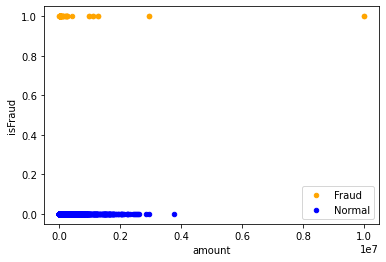

In [77]:
ax = frauds.plot.scatter(x='amount', y='isFraud', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='amount', y='isFraud', color='Blue', label='Normal', ax=ax)
plt.show()

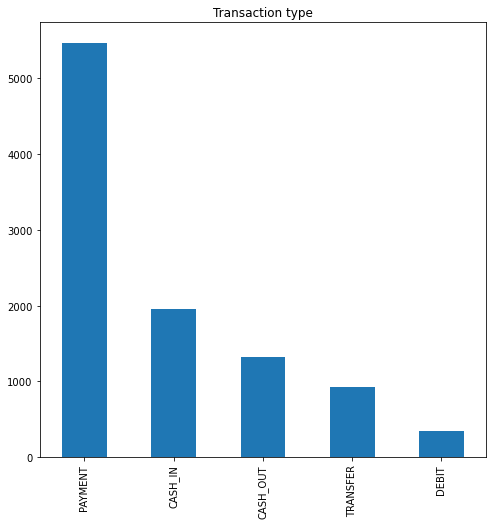

In [78]:
f, ax = plt.subplots(1, 1, figsize=(5, 3))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

In [79]:
df['type'] = df['type'].replace({'CASH_IN': '0', 'CASH_OUT': '1', 'DEBIT': '2', 'PAYMENT': '3', 'TRANSFER': '4'})
df

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7,3,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0,0
9996,7,3,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0,0
9997,7,3,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0,0
9998,7,4,317806.64,C1021138110,10901.0,0.00,C1935506329,103168.0,0.0,0,0


In [80]:
################################################################
################ Choosing a data ###############################
################################################################

In [81]:
X = df[['type','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']]
y = df['isFraud']
print("X and y sizes, respectively:", len(X), len(y))

X and y sizes, respectively: 10000 10000


In [82]:
################################################################
################ Training a modsels ############################
################################################################

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [84]:
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))

Train and test sizes, respectively: 6500 6500 | 3500 3500


In [85]:
print("Total number of frauds:", len(y.loc[df['isFraud'] == 1]))

Total number of frauds: 68


In [86]:
print("Number of frauds on y_test:", len(y_test.loc[df['isFraud'] == 1]))

Number of frauds on y_test: 25


In [87]:
print("Number of frauds on y_train:", len(y_train.loc[df['isFraud'] == 1]))

Number of frauds on y_train: 43


In [88]:
log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)
y_predlog=log_reg.predict(X_test)

In [89]:
clf = GaussianNB()
clf.fit(X_train , y_train)
y_predNB=clf.predict(X_test)

In [90]:
################################################################
################ Evaluation ####################################
################################################################

In [91]:
Mat_confusionlog=confusion_matrix(y_test,y_predlog)
accuracydumodellog=accuracy_score(y_test, y_predlog)
rappeldumodellog=recall_score(y_test, y_predlog)
precisiondumodellog=precision_score(y_test, y_predlog)
scoreF1dumodellog=f1_score(y_test, y_predlog)

In [92]:
Mat_confusionNB=confusion_matrix(y_test,y_predNB)
accuracydumodelNB=accuracy_score(y_test, y_predNB)
rappeldumodelNB=recall_score(y_test, y_predNB)
precisiondumodelNB=precision_score(y_test, y_predNB)
scoreF1dumodelNB=f1_score(y_test, y_predNB)

In [93]:
print("la matrice de confusion du model de la regression logistique est : \n ", Mat_confusionlog)
print("la matrice de confusion du model bayesian naif est : \n ", Mat_confusionNB)

la matrice de confusion du model de la regression logistique est : 
  [[3398   77]
 [   3   22]]
la matrice de confusion du model bayesian naif est : 
  [[3433   42]
 [  22    3]]


In [94]:
print("l'accuracy(en %) du model de la regression logistique  est : ",accuracydumodellog*100)
print("l'accuracy(en %) du model bayesian naif  est : ",accuracydumodelNB*100)

l'accuracy(en %) du model de la regression logistique  est :  97.71428571428571
l'accuracy(en %) du model bayesian naif  est :  98.17142857142858


In [95]:
print("le rappel(en %) du model de la regression logistique  est : ",rappeldumodellog*100)
print("le rappel(en %) du model bayesian naif  est : ",rappeldumodelNB*100)

le rappel(en %) du model de la regression logistique  est :  88.0
le rappel(en %) du model bayesian naif  est :  12.0


In [96]:
print("la precision(en %) du model de la regression logistique  est : ",precisiondumodellog*100)
print("la precision(en %) du model bayesian naif  est : ",precisiondumodelNB*100)

la precision(en %) du model de la regression logistique  est :  22.22222222222222
la precision(en %) du model bayesian naif  est :  6.666666666666667


In [98]:
print("le score F1(en %) du model de la regression logistique  est : ",scoreF1dumodellog*100)
print("le Score F1(en %) du model bayesian naif  est : ",scoreF1dumodelNB*100)

le score F1(en %) du model de la regression logistique  est :  35.48387096774193
le Score F1(en %) du model bayesian naif  est :  8.571428571428573
